In [1]:
import numpy as np
import ceo
import scipy.io as spio
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
center = spio.loadmat('m1s7_orth_base.mat')
print("Center\n",center.keys())
print([center[_].shape for  _ in ['Xsurface','Ysurface','Urn']])
outer = spio.loadmat('m1s1_orth_base.mat')
print("Outer",outer.keys())
print([outer[_].shape for  _ in ['Xsurface','Ysurface','Urn']])

Center
 dict_keys(['__header__', '__version__', '__globals__', 'G_', 'Urn', 'Xsurface', 'Ysurface'])
[(25794, 1), (25794, 1), (25794, 154)]
Outer dict_keys(['__header__', '__version__', '__globals__', 'G_', 'Urn', 'Xsurface', 'Ysurface'])
[(27685, 1), (27685, 1), (27685, 165)]


In [3]:
xyc =np.hstack([center[_] for _ in ['Xsurface','Ysurface']])
zc = center['Urn'][:,:-3]
xyo =np.hstack([outer[_] for _ in ['Xsurface','Ysurface']])
zo = outer['Urn'][:,:-3]
zc_ext = np.append(zc,np.zeros((zc.shape[0],zo.shape[1]-zc.shape[1])),1)
zc.shape,zo.shape,zc_ext.shape

((25794, 151), (27685, 162), (25794, 162))

In [4]:
L = 8.5 # meter
N_L = 201 # pixel
C = ceo.Mapping(xy=xyc ,z=zc_ext)(N_L,L)
O = ceo.Mapping(xy=xyo ,z=zo)(N_L,L)

In [5]:
OC = ceo.mapping.cat(O,C,[0]*6+[1])

In [6]:
OC.dump('FEM_BM')

In [7]:
import numpy as np
import ceo
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
gmt = ceo.GMT_MX(M1_mirror_modes=u'FEM_BM',M1_N_MODE=162)

In [9]:
src = ceo.Source('V',rays_box_sampling=48*16+1,rays_box_size=25.5,rays_origin=[0,0,25])
src>>(gmt,)

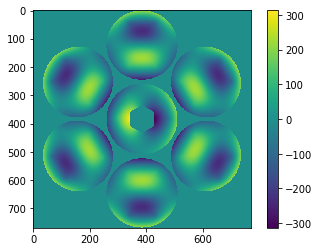

In [10]:
~gmt

gmt.M1.modes.a[:,6] = 1e-5
gmt.M1.modes.update()
+src
plt.imshow(src.phase.host(units='nm'))
plt.colorbar()